In [48]:
# file to get combined fits to the mocks 
%matplotlib inline
import sys
import os
import getdist
from getdist import plots, MCSamples
# this is Cullan's code to run and plot the second gen mocks with all appropriate settings 
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp
import pandas as pd
import emcee 
from desilike.samples import Chain

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
desilike data loaded
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no

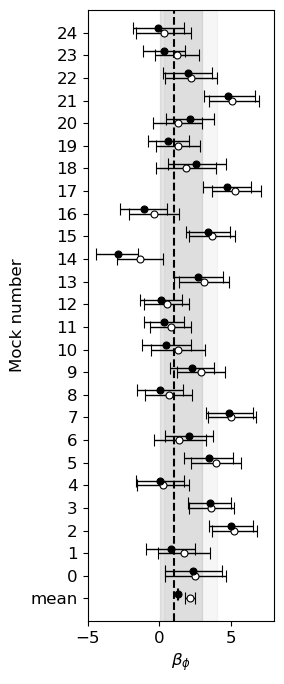

In [52]:

data = 'Xi'
recon = 'post_recon' 
broadband_method = 'polynomial'
realisation_number = 'mean'

weights_barry = np.zeros(26)
barry_centers = []
desilike_centers = []
weights_desilike = np.zeros(26)

# you need the full path to the chains you want to read in 
path = '/pscratch/sd/a/abbew25/csvs Second Gen UPDATED BARRY/'
plt.rcParams['font.size'] = 12   

plt.rcParams["figure.figsize"] = (3, 7)

xx = ['mean'] + [str(i) for i in np.linspace(0, 24, 25, dtype='int')]

# BARRY 
for jj, j in enumerate(xx): 
   
    counter = jj
    
    IW = None 
    
    df_fit = pd.read_csv(path + 'chains_' + 'LRG3+ELG1' + '_' + recon + '_' + broadband_method + '_phaseshift_' + data + '_' + j + '.csv', index_col=None)

    weight_df = df_fit['weights']

    for i, item in enumerate(['LRG1','LRG2','ELG2']):
        df = pd.read_csv(path + 'chains_' + item + '_' + recon + '_' + broadband_method + '_phaseshift_' + data + '_' + j + '.csv', index_col=None)
        weight = df['weights']
        df = df[[r'$\beta_{\phi(N_{\mathrm{eff}})}$']]

        s = MCSamples(samples=df.to_numpy(), weights=weight, names=[r'$\beta_{\phi}$'], 
        settings={'mult_bias_correction_order':1,'smooth_scale_2D':0.7,'smooth_scale_1D':0.7})

        if i == 0:
            IW= s.get1DDensity(name='$\\beta_{\\phi}$').Prob(df_fit[r'$\beta_{\phi(N_{\mathrm{eff}})}$'].to_numpy())
        else:
            IW *= s.get1DDensity(name='$\\beta_{\\phi}$').Prob(df_fit[r'$\beta_{\phi(N_{\mathrm{eff}})}$'].to_numpy())


    sdf = MCSamples(samples=df_fit.to_numpy(), weights=weight_df*IW, names=df_fit.columns.to_list(), 
          settings={'mult_bias_correction_order':1,'smooth_scale_2D':0.7,'smooth_scale_1D':0.7})

    x = sdf.getMargeStats().parWithName(r'$\beta_{\phi(N_{\mathrm{eff}})}$')
    
    low, centre, high = x.limits[0].lower, x.mean, x.limits[0].upper
        
    barry_centers.append(centre)
    
    w = 1.0/ ( (centre - low)/2.0 + (high - centre)/2.0 )**2
    #print(w)
    weights_barry[jj] = w
    
    if j == 'mean':
        plt.errorbar(centre, counter, xerr=[[(centre - low)/5.0], [(high - centre)/5.0]], fmt='o', color='white', ecolor='black', elinewidth=1, capsize=4, 
        markeredgewidth=0.8, markeredgecolor='black', markersize=5, zorder=5)
    else:
        plt.errorbar(centre, counter, xerr=[[(centre - low)], [(high - centre)]], fmt='o', color='white', ecolor='black', elinewidth=1, capsize=4, 
        markeredgewidth=0.8, markeredgecolor='black', markersize=5, zorder=5)
        
        
# DESILIKE     




# path to chains for desilike fits - Hugo  
path = '/global/cfs/projectdirs/desi/users/hugoriv/BAO_Neff/chains results/'
    
# LRG1
nchains = 7
burnin=0.3
thin=1
chains = {}


print('desilike data loaded')  


for jj, j in enumerate(xx): 
   
    counter = jj
    
    IW = None 
    
    chains_path = (f'/global/cfs/projectdirs/desi/users/hugoriv/desilike/SecondGen_Neff'
    f'/desilike2D_{j}_sampling_xi_secgenV1_2_recsym_poly_GCcomb_LRG+ELG_z0.8-1.1')
    chain_power_mock = Chain.concatenate([Chain.load(chains_path + f'_chain{k}.npy').remove_burnin(burnin)[::thin] for k in range(nchains)])
    beta_shiftELGLRG13=np.array(chain_power_mock['baoshift'].flatten())
    

    for i, item in enumerate(['LRG_z0.4-0.6', 'LRG_z0.6-0.8','ELG_LOPnotqso_z1.1-1.6']):
        
        chains_path = (f'/global/cfs/projectdirs/desi/users/hugoriv/desilike/SecondGen_Neff'
        f'/desilike2D_{j}_sampling_xi_secgenV1_2_recsym_poly_GCcomb_' + item)
        chain_power_mock = Chain.concatenate([Chain.load(chains_path + f'_chain{k}.npy').remove_burnin(burnin)[::thin] for k in range(nchains)])
        beta_shift=np.array(chain_power_mock['baoshift'].flatten())

        s = MCSamples(samples=beta_shift, names=[r'$\beta_{\phi}$'], 
        settings={'mult_bias_correction_order':1,'smooth_scale_2D':0.7,'smooth_scale_1D':0.7})

        if i == 0:
            IW= s.get1DDensity(name='$\\beta_{\\phi}$').Prob(beta_shiftELGLRG13)
        else:
            IW *= s.get1DDensity(name='$\\beta_{\\phi}$').Prob(beta_shiftELGLRG13)


    sdf = MCSamples(samples=beta_shiftELGLRG13, weights=IW, names=[r'$\beta_{\phi(N_{\mathrm{eff}})}$'], 
          settings={'mult_bias_correction_order':1,'smooth_scale_2D':0.7,'smooth_scale_1D':0.7})

    x = sdf.getMargeStats().parWithName(r'$\beta_{\phi(N_{\mathrm{eff}})}$')
    
    low, centre, high = x.limits[0].lower, x.mean, x.limits[0].upper
        
    desilike_centers.append(centre)
    
    w = 1.0/ ( (centre - low)/2.0 + (high - centre)/2.0 )**2
    #print(w)
    weights_desilike[jj] = w
    
    if j == 'mean':
        plt.errorbar(centre, counter+0.2, xerr=[[(centre - low)/5.0], [(high - centre)/5.0]], fmt='o', color='black', ecolor='black', elinewidth=1, capsize=4, 
        markeredgewidth=0.8, markeredgecolor='black', markersize=5, zorder=5)
    else:
        plt.errorbar(centre, counter+0.2, xerr=[[(centre - low)], [(high - centre)]], fmt='o', color='black', ecolor='black', elinewidth=1, capsize=4, 
        markeredgewidth=0.8, markeredgecolor='black', markersize=5, zorder=5)

        
    

mean_barry = np.mean(np.array(barry_centers)[:-1])
mean_barry_weighted = np.average(np.array(barry_centers)[:-1], weights=weights_barry[:-1])
mean_desilike = np.mean(np.array(desilike_centers)[:-1])
mean_desilike_weighted = np.average(np.array(desilike_centers)[:-1], weights=weights_desilike[:-1])
stdev_barry = np.std(np.array(barry_centers)[:-1])
stdev_desilike = np.std(np.array(desilike_centers)[:-1])

N = 25.0 
stdev_barry_weighted = np.sqrt(np.sum((np.array(barry_centers)[:-1] - mean_barry_weighted)**2 * weights_barry[:-1]))/(np.sqrt(np.sum(weights_barry[:-1])*(N-1.0)/N))

stdev_desilike_weighted = np.sqrt(np.sum((np.array(desilike_centers)[:-1] - mean_desilike_weighted)**2 * weights_desilike[:-1]))/(np.sqrt(np.sum(weights_desilike[:-1])*(N-1.0)/N))

print(abs(mean_barry_weighted - mean_desilike_weighted))
print(abs(barry_centers[-1] - desilike_centers[-1]))
print(stdev_desilike_weighted)


plt.fill_betweenx([-1, 26], [mean_barry_weighted - stdev_barry_weighted], [mean_barry_weighted + stdev_barry_weighted], color='lightgrey', alpha=0.2)
plt.fill_betweenx([-1, 26], [mean_desilike_weighted - stdev_desilike_weighted], [mean_desilike_weighted + stdev_desilike_weighted], color='grey', alpha=0.2)

    
plt.vlines(1.0, -1, 26, color='black', linestyle='--')
plt.xlabel('$\\beta_{\\phi}$')
plt.ylabel('Mock number')
plt.yticks(np.arange(0, 26), labels=['mean', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
                '16', '17', '18', '19', '20', '21', '22', '23', '24',], )
plt.ylim(-1, 26)
plt.xlim(-5, 8)
plt.tight_layout()
plt.savefig('combinedfits_plot.pdf', dpi=300)#, bbox_inches='tight')
plt.show()
    

In [49]:

print(0.713/1.47)

0.4850340136054422
